## Planet Plot Demo

In [1]:
import sctoolbox.utilities as utils
import sctoolbox.plotting.planet_plot as pp

Unable to determine R home: [Errno 2] No such file or directory: 'R'


#### load adata

In [2]:
adata = utils.load_h5ad("/mnt/agnerds/user/aviral.jain/all-snRNA.h5ad")

[INFO] The adata object was loaded from: /mnt/agnerds/user/aviral.jain/all-snRNA.h5ad


In [3]:
adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 191795 × 29046
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'donor_id', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'X_approximate_distribution', 'batch_condition', 'cell_type_original_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_

In [4]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
feature_id,,,,,
ENSG00000177613,False,CSTF2T,NCBITaxon:9606,gene,4110
ENSG00000128918,False,ALDH1A2,NCBITaxon:9606,gene,8127
ENSG00000143977,False,SNRPG,NCBITaxon:9606,gene,1764
ENSG00000196177,False,ACADSB,NCBITaxon:9606,gene,6234
ENSG00000244482,False,LILRA6,NCBITaxon:9606,gene,2718
...,...,...,...,...,...
ENSG00000179152,False,TCAIM,NCBITaxon:9606,gene,8743
ENSG00000248174,False,LINC02268,NCBITaxon:9606,gene,3422
ENSG00000249875,False,RP11-51M24.1,NCBITaxon:9606,gene,366


In [5]:
fibroblast_marker_genes = ["COL1A1", "COL3A1","TGFB1", "MMP2", "ACTA2"]
vascular_endothelium_marker_genes = ["NOS3","VCAM1","ICAM1","SELE" ,"KLF2"]
myocardium_marker_genes = ["TNF","NPPB","NPPA","MYH7","ACTC1"]
blood_marker_genes = ["IL6","CRP","MMP9","TNF","CXCL8"]
immune_marker_genes = ["IL1B","TNF","CCL2","CD68","TGFBR2"]

In [6]:
x_col = "disease"
y_col = "cell_type_original"
x_label = "disease"
y_label = "cell type"
expression_threshold = 0
color_schema = "viridis"

In [7]:
plot_vars = pp.planet_plot_anndata_preprocess(adata,
                                  x_col,
                                  y_col,
                                  genes = myocardium_marker_genes,
                                  gene_symbols= 'feature_name',
                                  layer_value_aggregator = "mean",
                                  gene_count_aggregator = "median",
                                  gene_expression_aggregator = "median",
                              )

/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:165: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='total_count')
/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exceedance_counts = df_all.groupby([x_col, y_col]).apply(lambda x: count_greater_than_threshold(x[genes], expression_threshold)).reset_index()
/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:171: FutureWarning: The default of obser

In [8]:
plot_vars

,disease,cell_type_original,total_count,TNF_x,NPPB_x,NPPA_x,MYH7_x,ACTC1_x,TNF_y,NPPB_y,...,TNF_percentage_exceedance,TNF_percentage_max_value,NPPB_percentage_exceedance,NPPB_percentage_max_value,NPPA_percentage_exceedance,NPPA_percentage_max_value,MYH7_percentage_exceedance,MYH7_percentage_max_value,ACTC1_percentage_exceedance,ACTC1_percentage_max_value
0,myocardial infarction,Adipocyte,508.0,1.0,86.0,75.0,149.0,94.0,0.002213,0.194114,...,0.196850,4.659031,16.929134,55.686390,14.763780,66.458176,29.330709,15.837221,18.503937,21.044422
1,myocardial infarction,Cardiomyocyte,46200.0,20.0,9830.0,4388.0,39175.0,33198.0,0.000370,0.348584,...,0.043290,0.778517,21.277056,99.999992,9.497835,48.401039,84.794372,74.116295,71.857143,96.825912
2,myocardial infarction,Cycling cells,2757.0,7.0,118.0,70.0,684.0,330.0,0.003372,0.077202,...,0.253899,7.099062,4.280015,22.147451,2.538992,18.438128,24.809576,20.946486,11.969532,21.214825
3,myocardial infarction,Endothelial,26509.0,83.0,2469.0,1946.0,11059.0,7480.0,0.006232,0.189963,...,0.313101,13.121074,9.313818,54.495724,7.340903,61.358322,41.717907,39.059021,28.216832,56.150497
4,myocardial infarction,Fibroblast,37857.0,22.0,4525.0,2787.0,14255.0,9837.0,0.000943,0.213207,...,0.058113,1.985976,11.952875,61.163910,7.361915,54.034344,37.654859,30.353762,25.984626,44.555477
5,myocardial infarction,Lymphoid,4537.0,36.0,535.0,431.0,1560.0,872.0,0.017329,0.270480,...,0.793476,36.482975,11.791933,77.594109,9.499669,84.018456,34.383954,32.420761,19.219749,40.068142
6,myocardial infarction,Mast,569.0,9.0,74.0,71.0,230.0,112.0,0.019297,0.233414,...,1.581722,40.627068,13.005272,66.960625,12.478032,100.000000,40.421793,32.255852,19.683656,34.073410
7,myocardial infarction,Myeloid,17927.0,56.0,2273.0,1472.0,6253.0,3796.0,0.005503,0.269619,...,0.312378,11.585301,12.679199,77.346924,8.211078,64.678078,34.880348,30.195709,21.174764,39.656528
8,myocardial infarction,Neuronal,1860.0,1.0,199.0,125.0,827.0,559.0,0.000650,0.228767,...,0.053763,1.367552,10.698925,65.627617,6.720430,57.201962,44.462366,40.280910,30.053763,58.329472
9,myocardial infarction,Pericyte,9083.0,2.0,799.0,624.0,4226.0,2853.0,0.000343,0.182453,...,0.022019,0.722330,8.796653,52.341244,6.869977,58.803879,46.526478,42.244308,31.410327,60.568085


#### Dotplot like plot
Here you only see the percentage of cells expressed in the cluster.

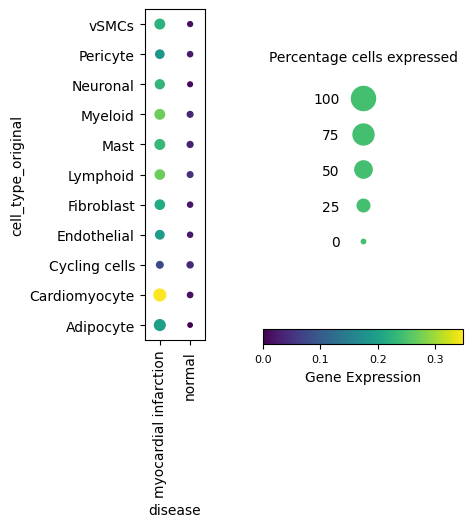

In [9]:
pp.planet_plot_render(plot_vars,
                  x_col,
                  y_col,
                  mode = "aggregate",
                  size_value = "percentage",
                  color_value = "value",
                  use_log_scale = False,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema)

#### Count as size_value
Here you see also the count of cells in the cluster. It can be noted that different clusters have different count.

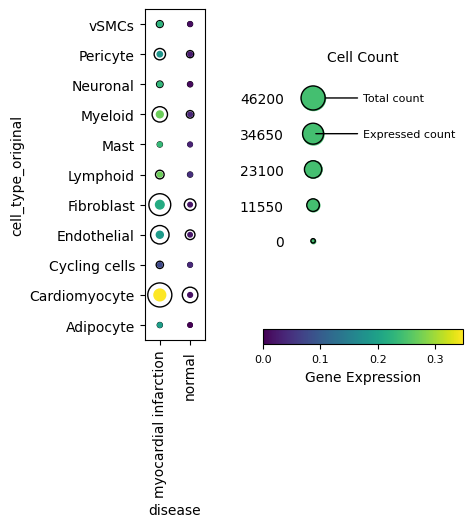

In [10]:
pp.planet_plot_render(plot_vars,
                  x_col,
                  y_col,
                  mode = "aggregate",
                  size_value = "count",
                  color_value = "value", 
                  use_log_scale = False,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema)

#### Planet mode
In order to see the individual contributions of the genes to the aggregate, we use the planet mode.

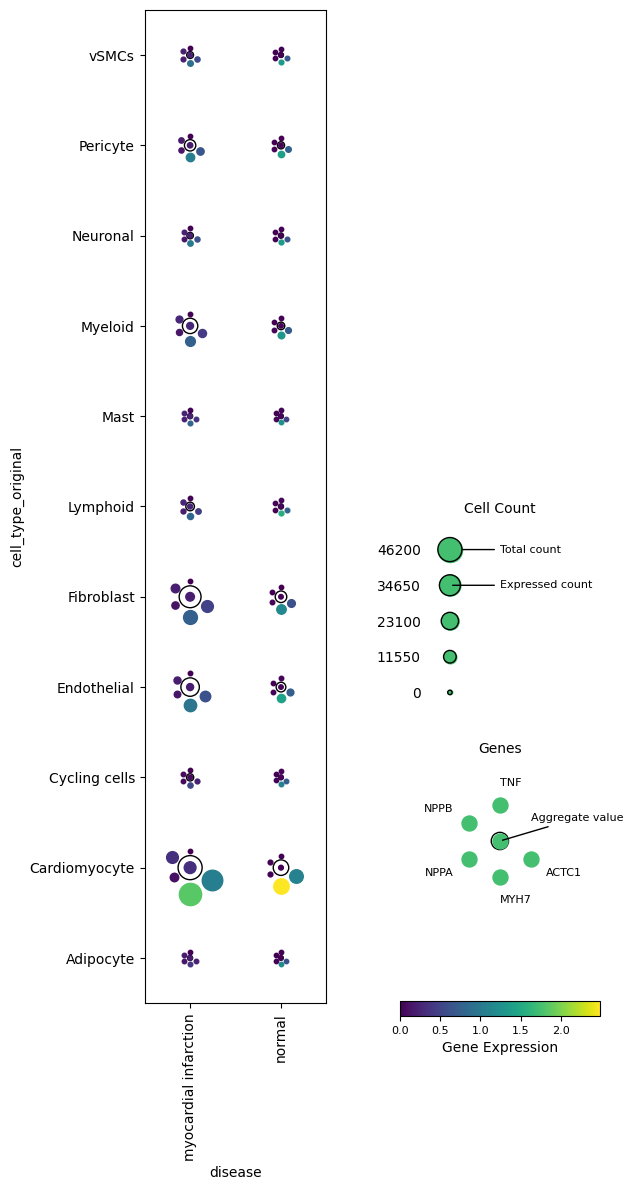

In [11]:
pp.planet_plot_render(plot_vars,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "value",
                  use_log_scale = False,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema)

#### percentage_max as color_value
The gene expressions in the last plot have become similar coloured, this is because including the individual gene expressions has greatly increased the range of gene expressions. In order to be able to do a better comparative analysis across the clusters for different genes. we set the color value to percentage_max, where the expression value for the dot (center or planet)  is calculated as a percentage of the maximum expression of that dot across all the clusters.

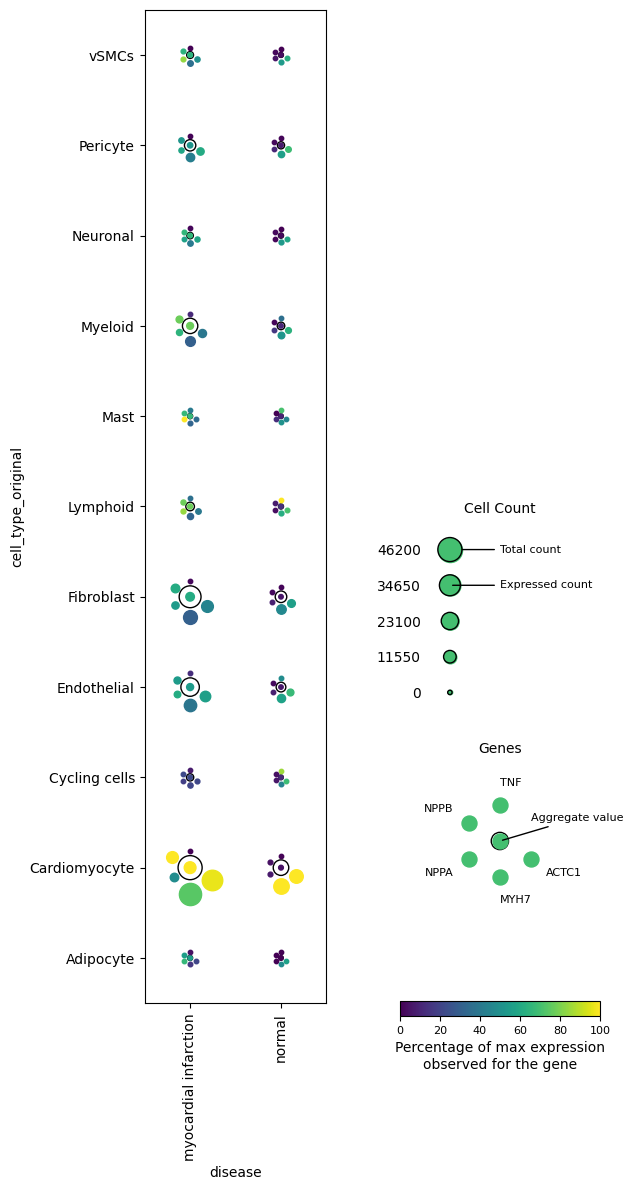

In [12]:
pp.planet_plot_render(plot_vars,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "percentage_max",
                  use_log_scale = False,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema)

#### use_log_scale
As some clusters have a relatively very small size compared to others, it is hard to get an estimate of the difference in count across different clusters. We can use log scale to shift the distribution a bit to get a better view and may be able to filter out insignificant values.

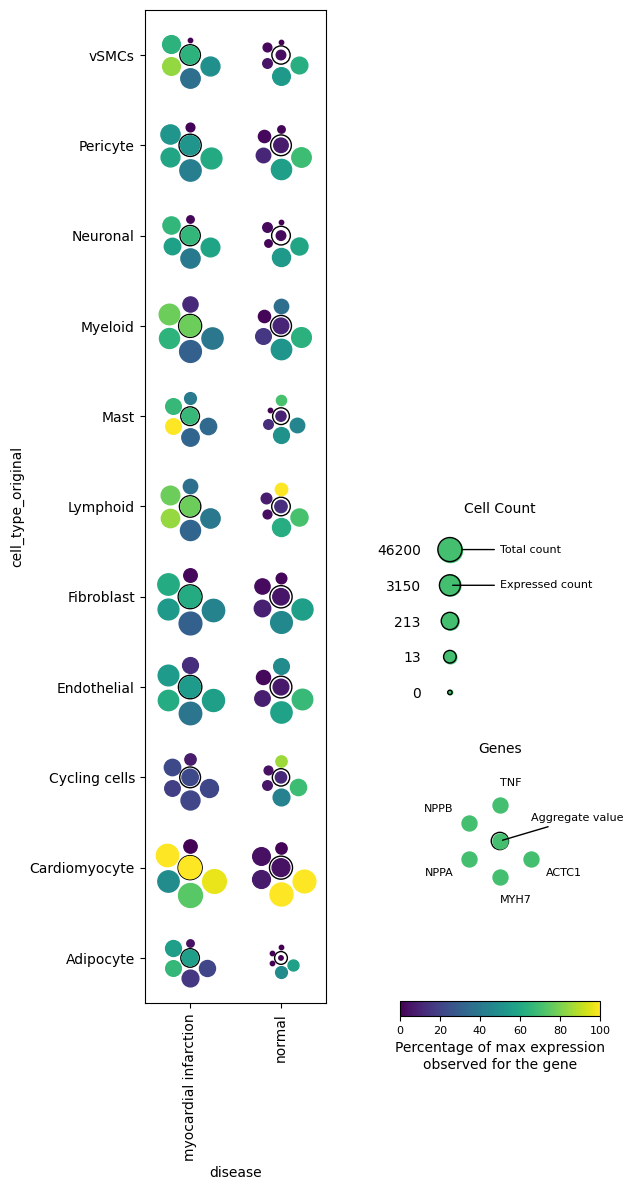

In [13]:
pp.planet_plot_render(plot_vars,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "percentage_max",
                  use_log_scale = True,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema)

#### Plot obs_columns
But, filtering cannot be done solely on the basis of cell count, we have many scoring metrics stored in the obs column. The planet plot also has an advanced preprocessing function where you can pass the obs columns and get the aggregate values to plot them as planets.

In [14]:
# Prepare df with obs_cols
plot_vars_2 = pp.planet_plot_anndata_preprocess_advanced(adata,
                                  x_col,
                                  y_col,
                                  genes = myocardium_marker_genes,
                                  obs_columns=['percent_mito', 'doublet_score', 'dissociation_score'],
                                  gene_symbols= 'feature_name',
                                  layer_value_aggregator = "mean",
                                  gene_count_aggregator = "median",
                                  gene_expression_aggregator = "median",
                              )

/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:325: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='total_count')
/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:328: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exceedance_counts = df_all.groupby([x_col, y_col]).apply(lambda x: pd.Series({total_columns[i]: count_greater_than_threshold(x[total_columns[i]], total_thresholds[i]) for i in range(len(total_columns))})).reset_index()
/home/ajain/notebooks/planet_plot_testing_cop

/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:687: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc_array[p] = ax.scatter(secondary_x, secondary_y, s=row[planet_column+'_dot_area'], c=row[planet_column+PLANET_COLOR_VALUE_SUFFIX],cmap=planet_color_schemas[p], vmin=vmin_array[p], vmax=vmax_array[p])


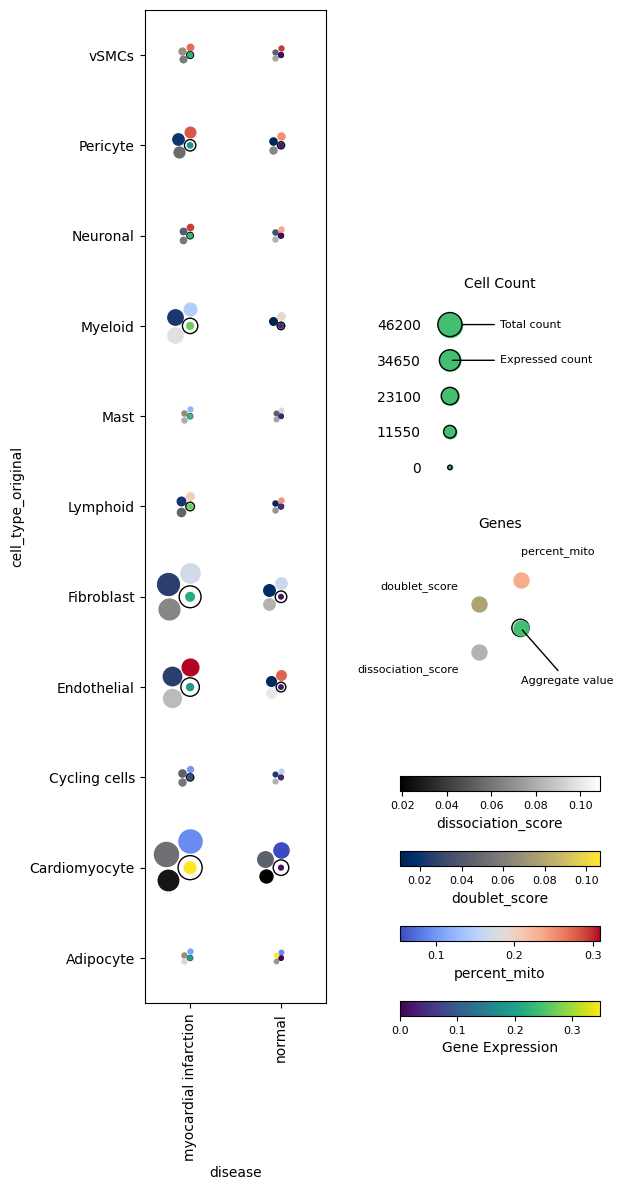

In [15]:
# Plot obs_columns using individual planet color schema
pp.planet_plot_render(plot_vars_2,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "value",
                  use_log_scale = False,
                  planet_columns = ['percent_mito', 'doublet_score', 'dissociation_score'],
                  color_schema = color_schema,
                  planet_color_schemas=[ "coolwarm", "cividis", "gray"])

#### obs columns with individual thresholds
Ofcoarse, we do not need to use the default threshold that we use for the gene expression also for the obs columns. We can pass a list of custom thresholds corresponding to each obs column.#

In [16]:
# Prepare df with individual thresholds
plot_vars_3 = pp.planet_plot_anndata_preprocess_advanced(adata,
                                  x_col,
                                  y_col,
                                  genes = myocardium_marker_genes,
                                  obs_columns=['percent_mito', 'doublet_score', 'dissociation_score'],
                                  obs_thresholds=[0.1, 0 ,0],
                                  gene_symbols= 'feature_name',
                                  layer_value_aggregator = "mean",
                                  gene_count_aggregator = "median",
                                  gene_expression_aggregator = "median",
                              )

/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:325: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='total_count')
/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:328: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exceedance_counts = df_all.groupby([x_col, y_col]).apply(lambda x: pd.Series({total_columns[i]: count_greater_than_threshold(x[total_columns[i]], total_thresholds[i]) for i in range(len(total_columns))})).reset_index()
/home/ajain/notebooks/planet_plot_testing_cop

/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:687: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc_array[p] = ax.scatter(secondary_x, secondary_y, s=row[planet_column+'_dot_area'], c=row[planet_column+PLANET_COLOR_VALUE_SUFFIX],cmap=planet_color_schemas[p], vmin=vmin_array[p], vmax=vmax_array[p])


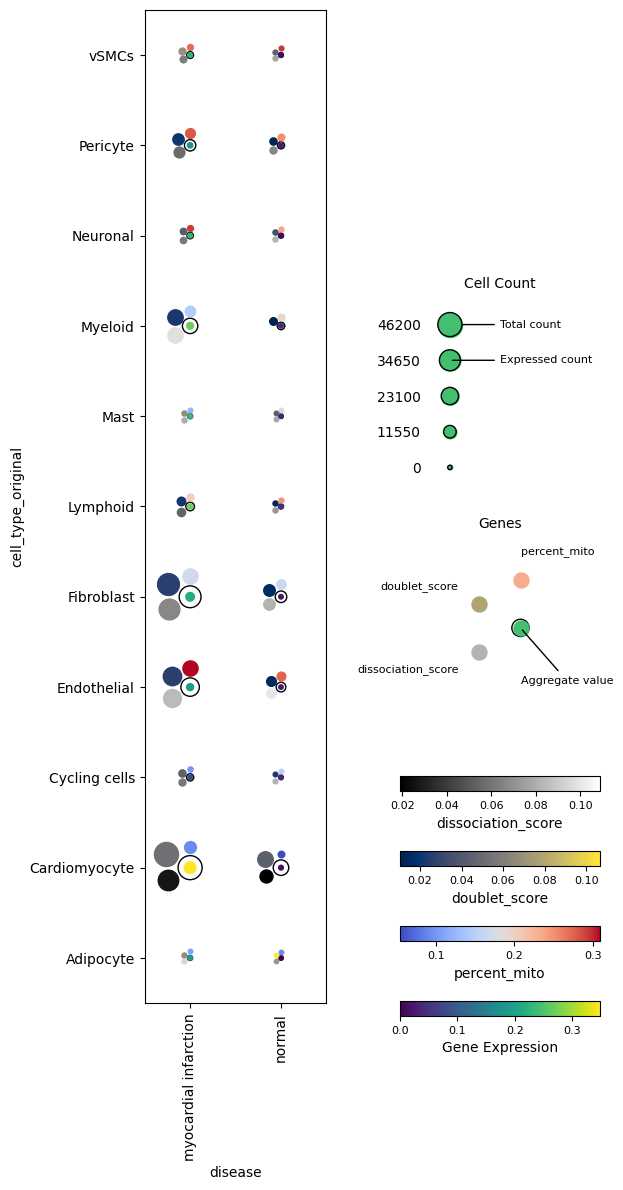

In [17]:
# Plot obs_columns using individual thresholds
pp.planet_plot_render(plot_vars_3,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "value",
                  use_log_scale = False,
                  planet_columns = ['percent_mito', 'doublet_score', 'dissociation_score'],
                  color_schema = color_schema,
                  planet_color_schemas=[ "coolwarm", "cividis", "gray"])

#### Switching percent_mito aggregator to 'median'
We can also pass custom aggregators corresponding to obs columns. Uppon switching to median, the range of percent_mito is reduced and as a result it is easier to filter out the good quality clusters. We also modify the colorbar labels to show that now the median is displayed. There is a range of arguments customize all the labels in the plot.

In [18]:
# Switching percent_mito aggregator to 'median'
plot_vars_4 = pp.planet_plot_anndata_preprocess_advanced(adata,
                                  x_col,
                                  y_col,
                                  genes = myocardium_marker_genes,
                                  obs_columns=['percent_mito', 'doublet_score', 'dissociation_score'],
                                  obs_aggregator_array=['median','median','median'],
                                  obs_thresholds=[0.1, 0 ,0],
                                  gene_symbols= 'feature_name',
                                  layer_value_aggregator = "mean",
                                  gene_count_aggregator = "median",
                                  gene_expression_aggregator = "median",
                              )

/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:325: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='total_count')
/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:328: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exceedance_counts = df_all.groupby([x_col, y_col]).apply(lambda x: pd.Series({total_columns[i]: count_greater_than_threshold(x[total_columns[i]], total_thresholds[i]) for i in range(len(total_columns))})).reset_index()
/home/ajain/notebooks/planet_plot_testing_cop

/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:687: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc_array[p] = ax.scatter(secondary_x, secondary_y, s=row[planet_column+'_dot_area'], c=row[planet_column+PLANET_COLOR_VALUE_SUFFIX],cmap=planet_color_schemas[p], vmin=vmin_array[p], vmax=vmax_array[p])


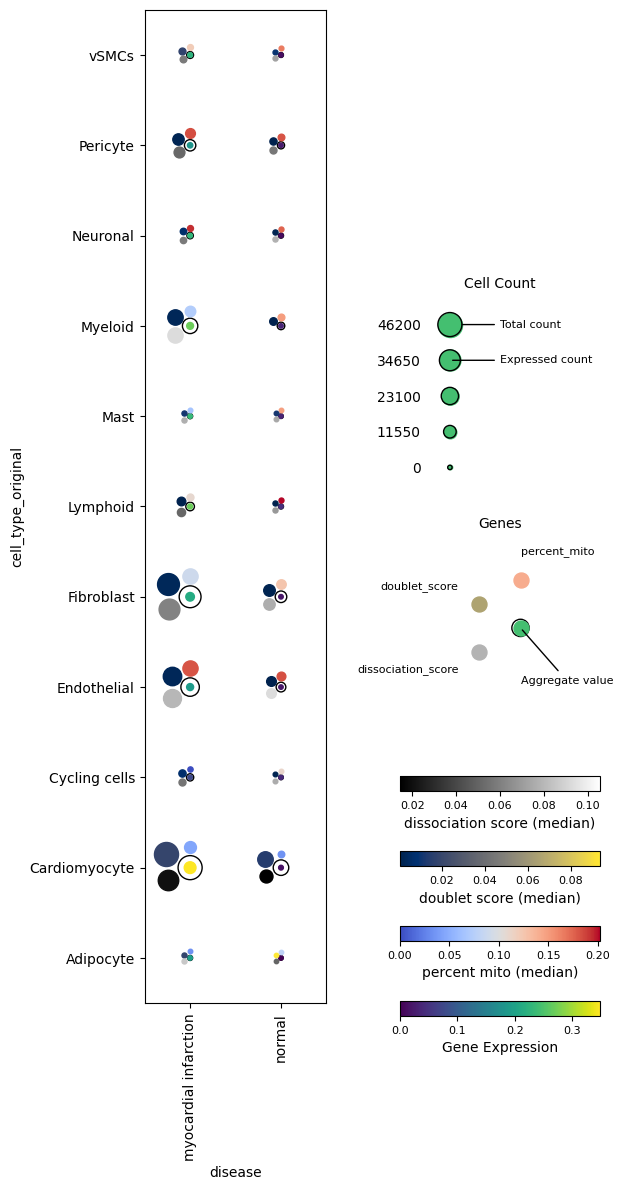

In [19]:
# Plotting with new aggregator, the range is reduced, better decisions can be made using the color.
pp.planet_plot_render(plot_vars_4,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "value",
                  use_log_scale = False,
                  planet_columns = ['percent_mito', 'doublet_score', 'dissociation_score'],
                  color_schema = color_schema,
                  planet_color_schemas=[ "coolwarm", "cividis", "gray"],
                  colorbar_label_array = ['percent mito (median)', 'doublet score (median)', 'dissociation score (median)']
                  )

#### Column subsetting
Now, we pass the filtered clusters in y_col_subset, to only use this subset for our plotting.

In [20]:
# subsetting according to percent mito
plot_vars_5 = pp.planet_plot_anndata_preprocess_advanced(adata,
                                  x_col,
                                  y_col,
                                  y_col_subset=['Cardiomyocite', 'Cycling cells', 'Adipocyte', 'Fibroblast'],
                                  genes = myocardium_marker_genes,
                                  obs_columns=['percent_mito', 'doublet_score', 'dissociation_score'],
                                  obs_thresholds=[0.1, 0 ,0],
                                  obs_aggregator_array=['median','median','median'],
                                  gene_symbols= 'feature_name',
                                  layer_value_aggregator = "mean",
                                  gene_count_aggregator = "median",
                                  gene_expression_aggregator = "median")

/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:325: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='total_count')
/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:328: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exceedance_counts = df_all.groupby([x_col, y_col]).apply(lambda x: pd.Series({total_columns[i]: count_greater_than_threshold(x[total_columns[i]], total_thresholds[i]) for i in range(len(total_columns))})).reset_index()
/home/ajain/notebooks/planet_plot_testing_cop

/home/ajain/notebooks/planet_plot_testing_copy/sctoolbox/plotting/planet_plot.py:687: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc_array[p] = ax.scatter(secondary_x, secondary_y, s=row[planet_column+'_dot_area'], c=row[planet_column+PLANET_COLOR_VALUE_SUFFIX],cmap=planet_color_schemas[p], vmin=vmin_array[p], vmax=vmax_array[p])


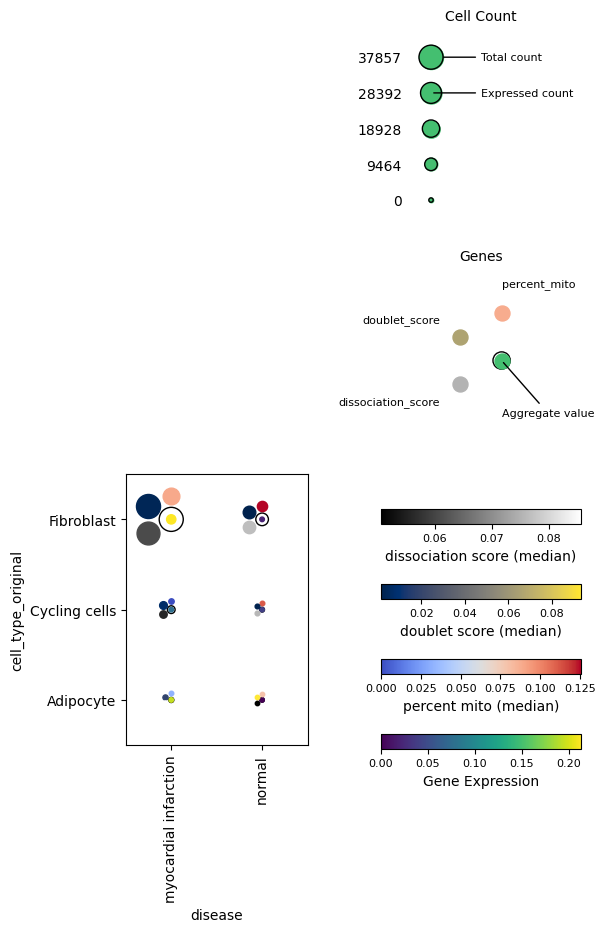

In [21]:
# plot the subset, better comparision
pp.planet_plot_render(plot_vars_5,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "value",
                  use_log_scale = False,
                  planet_columns = ['percent_mito', 'doublet_score', 'dissociation_score'],
                  color_schema = color_schema,
                  planet_color_schemas=[ "coolwarm", "cividis", "gray"],
                  colorbar_label_array = ['percent mito (median)', 'doublet score (median)', 'dissociation score (median)']
                  )

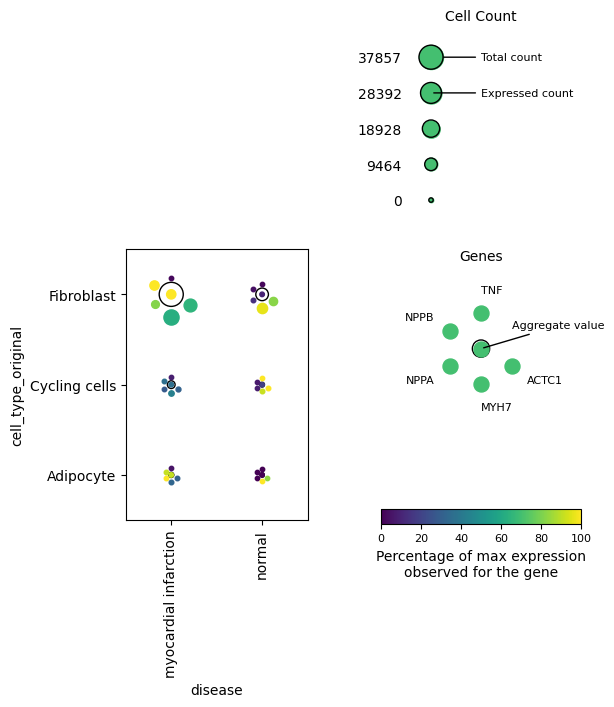

In [22]:
# use the same df for gene expression plot
pp.planet_plot_render(plot_vars_5,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "percentage_max",
                  use_log_scale = False,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema)

#### Figure size adjustment
Ther two parameters FIG_SIZE_SCALER and PLANET_DIST_SCALER can be tuned to adjust the figure size and planet distance in order to achieve a perfect looking plot.

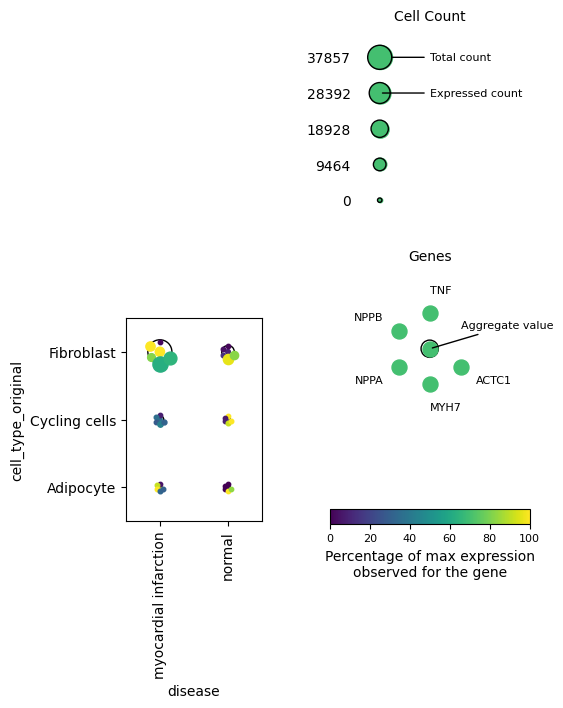

In [23]:
# saving space, reducing plot size, FIG_SIZE_SCALER=1.5 from 2 (default)
pp.planet_plot_render(plot_vars_5,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "percentage_max",
                  use_log_scale = False,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema,
                  FIG_SIZE_SCALER=1.5)

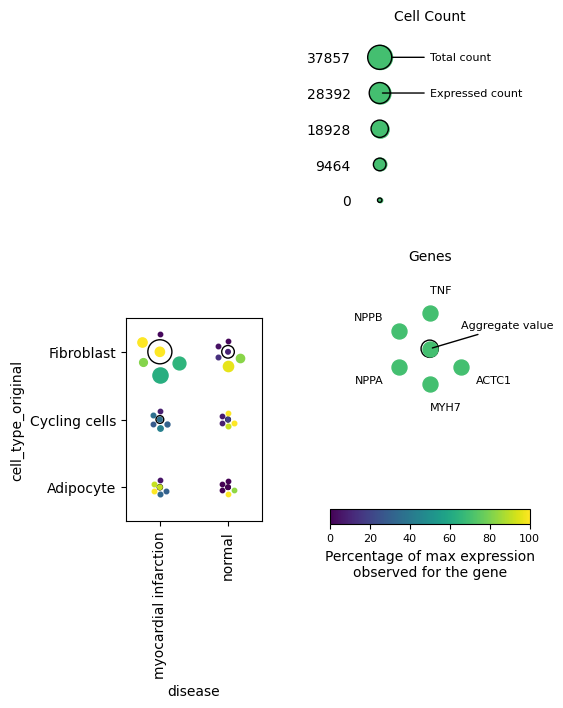

In [24]:
# Planets messed up, not problem! set adjust the PLANET_DIST_SCALER
pp.planet_plot_render(plot_vars_5,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "percentage_max",
                  use_log_scale = False,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema,
                  FIG_SIZE_SCALER=1.5,
                  PLANET_DIST_SCALER=2.35)

#### Legend 
There is a great range of parameters to tune size and alignment of the legends individually.

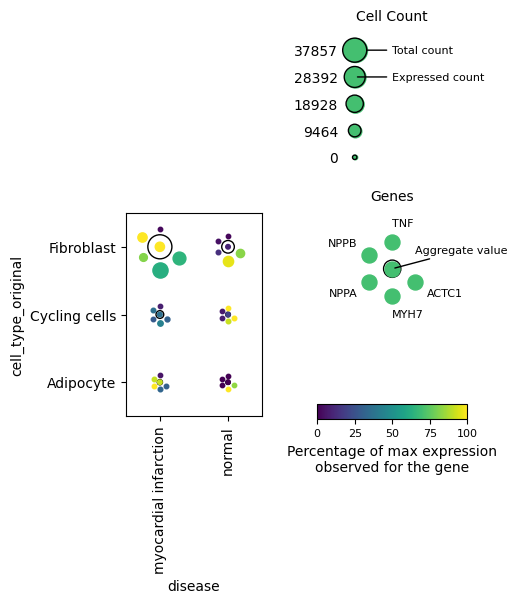

In [25]:
# Adjust legend sizes
pp.planet_plot_render(plot_vars_5,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "percentage_max",
                  use_log_scale = False,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema,
                  FIG_SIZE_SCALER=1.5,
                  PLANET_DIST_SCALER=2.35,
                  LEGEND_COLOR_WIDTH=1.5,
                  LEGEND_DOT_WIDTH=1.5,
                  LEGEND_DOT_HEIGHT=1.5,
                  LEGEND_PLANET_WIDTH=1.5,
                  LEGEND_PLANET_HEIGHT=1.5
                  )

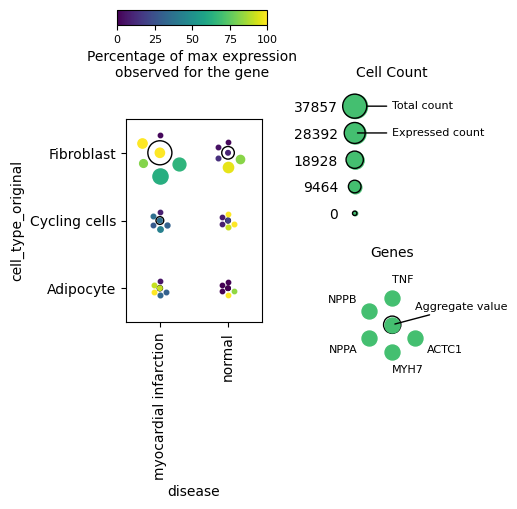

In [26]:
# Make it even more compact, adjust legend alignments!
pp.planet_plot_render(plot_vars_5,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "percentage_max",
                  use_log_scale = False,
                  planet_columns = myocardium_marker_genes,
                  color_schema = color_schema,
                  FIG_SIZE_SCALER=1.5,
                  PLANET_DIST_SCALER=2.35,
                  LEGEND_COLOR_WIDTH=1.5,
                  LEGEND_DOT_WIDTH=1.5,
                  LEGEND_DOT_HEIGHT=1.5,
                  LEGEND_PLANET_WIDTH=1.5,
                  LEGEND_PLANET_HEIGHT=1.5,
                  LEGEND_COLOR_X_ALIGNMENT=-2,
                  LEGEND_COLOR_Y_ALIGNMENT=3,
                  LEGEND_DOT_Y_ALIGNMENT=-1.5,
                  LEGEND_PLANET_Y_ALIGNMENT=-1.5
                  )

### For more features read the documentation!